Import data from csv file

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas import ExcelFile


In [2]:
#import data form excel file
data = 'C:/users/hoai/Documents/github/DA/data_car_main.csv'
df = pd.read_csv(data)
print(df)

     STT   SO XE        NGAY Loai xe  Quang duong (km)     To   Tr     N  \
0      1   CE6_3  16/05/2020     06T             97.12  270.0   65  21.0   
1      2  CE10_2  16/05/2020     11T             82.38  206.0   55   6.0   
2      3   CE6_3  16/05/2020     06T             93.92  362.0  149  23.0   
3      4  CE10_2  16/05/2020     11T             97.35  309.0  170  14.0   
4      5   CE6_5  16/05/2020     06T             91.68  366.0  112  28.0   
..   ...     ...         ...     ...               ...    ...  ...   ...   
192  193   CE6_9  29/05/2020     06T             91.90  350.0  151  33.0   
193  194  CE7_11  29/05/2020     07T             99.08  295.0   72  19.0   
194  195  CE7_12  29/05/2020     07T             88.59  218.0   79  12.0   
195  196  CE7_12  29/05/2020     07T             92.54  230.0   56  25.0   
196  197  CE9_13  29/05/2020     13T             94.41  302.0  110  28.0   

                        d   dd  ...      M        E1         E2    E3  \
0           Tu

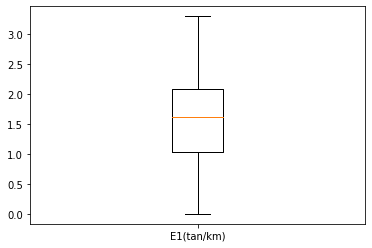

In [3]:
#single boxplot
plt.boxplot(df.E1)
plt.xticks([1],['E1(tan/km)'])
plt.show()

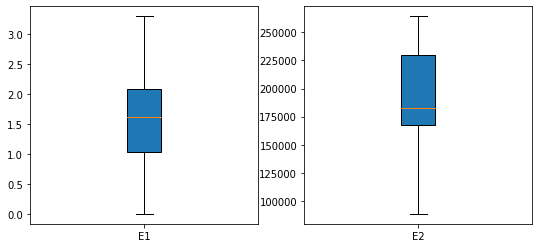

In [5]:
#multiple boxplot  using matpilot
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
loai_E1 = ["df.E1","df.L"]
bplot1 = ax1.boxplot(df.E1, vert = True, patch_artist=True, labels = ['E1'])
bplot2 = ax2.boxplot(df.E2, vert = True, patch_artist=True, labels = ['E2'])
plt.show()


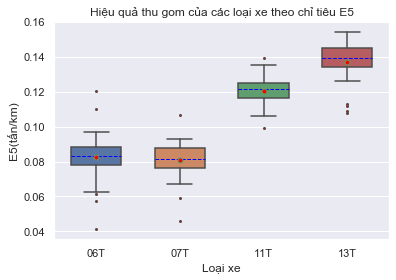

In [11]:
#multiple gruop boxplot using seaborn lib
# Boxplot E5 vs L
linestyle = dict(linestyle="--",linewidth = 1, color = "blue")
dotstyle = dict(marker = "o", markerfacecolor = "red", markersize = 2)
dotmean = dict(marker = "o", markerfacecolor = "red", markersize = 5)
sns.set(style='darkgrid')
box_E5_loaixe = sns.boxplot(x = 'Loai xe', y = 'E5', data =df,  order= ["06T","07T","11T","13T"],
                            showmeans=True,
                            meanprops = dotmean,
                            medianprops = linestyle,
                            flierprops = dotstyle,
                            width = 0.6
                            )
box_E5_loaixe.set(xlabel = "Loại xe", ylabel = "E5(tấn/km)", title = "Hiệu quả thu gom của các loại xe theo chỉ tiêu E5")
plt.show()

In [13]:
#R test
corr = df.corr(method ='pearson')
pd.pandas.set_option('display.max_columns', None)
print(corr)

                       STT  Quang duong (km)        To        Tr         N  \
STT               1.000000          0.070904  0.027496  0.004205 -0.003016   
Quang duong (km)  0.070904          1.000000  0.560183  0.381003  0.248934   
To                0.027496          0.560183  1.000000  0.702739  0.345068   
Tr                0.004205          0.381003  0.702739  1.000000  0.268885   
N                -0.003016          0.248934  0.345068  0.268885  1.000000   
dH               -0.015213          0.324028  0.337678  0.315946  0.264103   
Dh               -0.015213          0.324028  0.337678  0.315946  0.264103   
M                 0.098716         -0.007397  0.087419  0.222616  0.081725   
E1                0.036790         -0.013921  0.091596  0.081448  0.130360   
E2                0.001779          0.056877  0.143767  0.212456  0.148746   
E3               -0.074538          0.263440  0.308270  0.264142  0.287314   
E4               -0.043207          0.058691  0.079240  0.694977

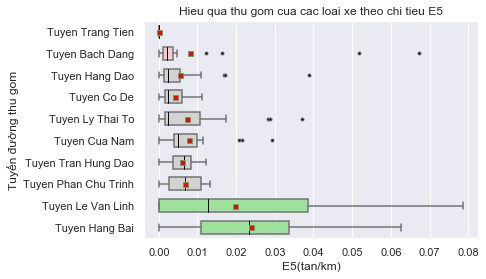

In [15]:
#Box plot E6 vs Tuyen
linestyle = dict(linestyle="-",linewidth = 1, color = "black")
dotstyle = dict(marker = "o", markerfacecolor = "black", markersize = 3)
dotmean = dict(marker = "s", markerfacecolor = "red", markersize = 5)
sns.set(style='darkgrid')
new_group = df.groupby("d")["E6"].median()
sorted_gruop = new_group.sort_values()
#print(sorted_gruop)
box_E1_loaixe = sns.boxplot(x = 'E6', y = 'd', data =df,  order= sorted_gruop.index,
                            showmeans=True,
                            meanprops = dotmean,
                            medianprops = linestyle,
                            flierprops = dotstyle,
                            width = 0.6,
                            palette=["pink","pink","lightgray","lightgray","lightgray","lightgray","lightgray","lightgray","lightgreen","lightgreen"]
                            )
box_E1_loaixe.set(xlabel = "E5(tan/km)", ylabel = "Tuyến đường thu gom", title = "Hieu qua thu gom cua cac loai xe theo chi tieu E5")
plt.show()


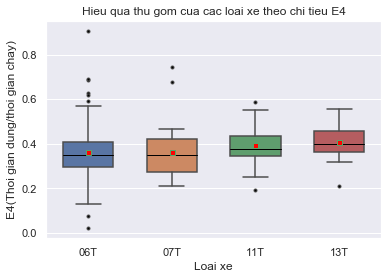

In [21]:
#Box plot E4 vs Loai xe
linestyle = dict(linestyle="-",linewidth = 1, color = "black")
dotstyle = dict(marker = "o", markerfacecolor = "black", markersize = 3)
dotmean = dict(marker = "s", markerfacecolor = "red", markersize = 5)
sns.set(style='darkgrid')
box_E1_loaixe = sns.boxplot(x ='Loai xe' , y ='E4' , data =df,  order= ["06T", "07T", "11T", "13T"],
                            showmeans=True,
                            meanprops = dotmean,
                            medianprops = linestyle,
                            flierprops = dotstyle,
                            width = 0.6,
                            )
box_E1_loaixe.set(ylabel = "E4(Thoi gian dung/thoi gian chay)", xlabel = "Loai xe", title = "Hieu qua thu gom cua cac loai xe theo chi tieu E4")
plt.show()

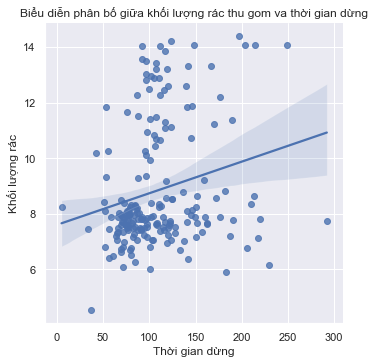

In [23]:
#Scatter plot Tr vs M
linestyle = dict(linestyle="-",linewidth = 1, color = "black")
dotstyle = dict(marker = "o", markerfacecolor = "black", markersize = 3)
dotmean = dict(marker = "s", markerfacecolor = "red", markersize = 5)
sns.set(style='darkgrid')
box_E1_loaixe = sns.lmplot(x ='Tr' , y ='M' , data =df,)
box_E1_loaixe.set(ylabel = "Khối lượng rác", xlabel = "Thời gian dừng", title = "Biểu diễn phân bố giữa khối lượng rác thu gom va thời gian dừng")
plt.show()

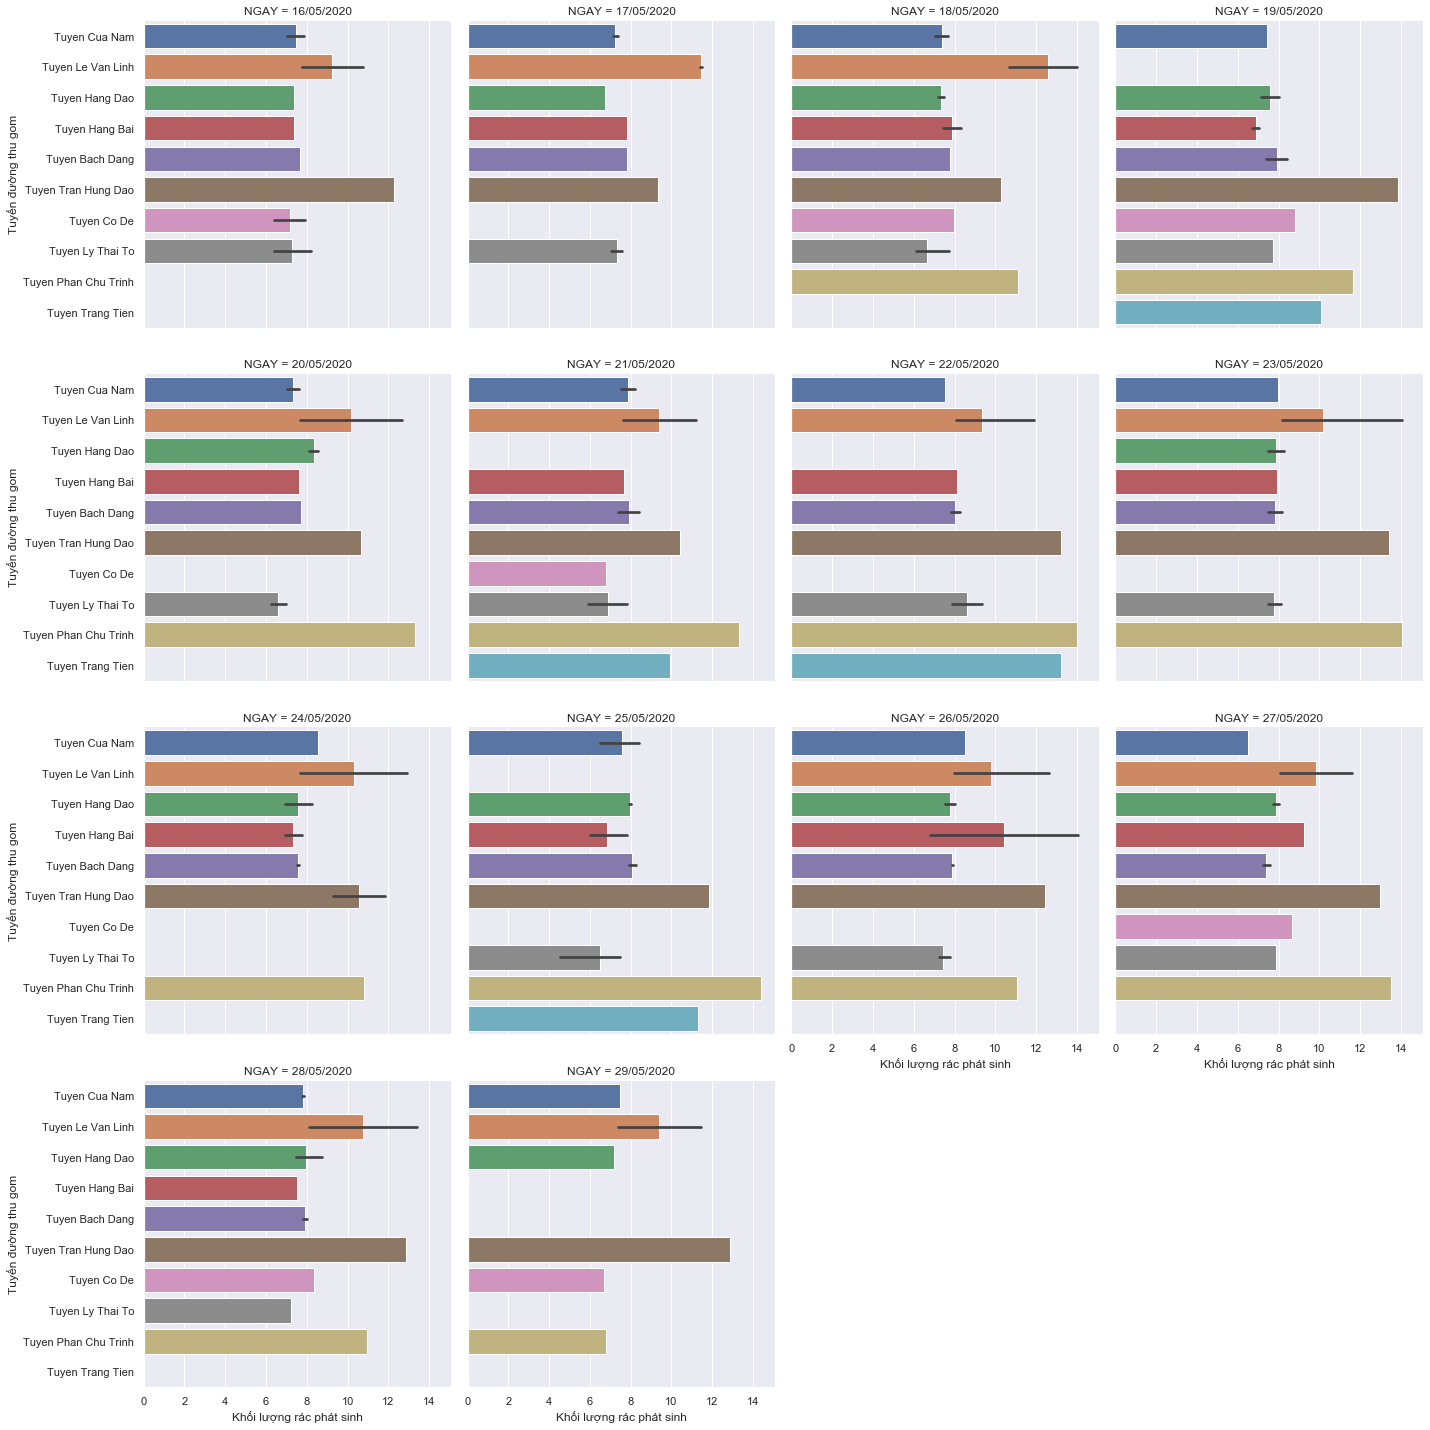

In [34]:
#Barplot tuyen, khoi luong theo ngay
g = sns.catplot( data = df, x = "M", y="d", col="NGAY", kind= "bar", col_wrap = 4, aspect=1)
g.set_axis_labels("Khối lượng rác phát sinh","Tuyến đường thu gom")
plt.show()


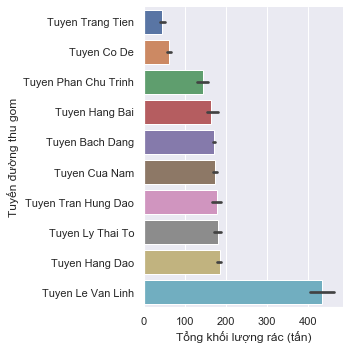

In [37]:
#Barplot tuyen, khoi luong
newgruop = df.groupby("d")["M"].sum()
sortedgruop = newgruop.sort_values()
# print(sortedgruop)
g = sns.catplot(data=df, x = "M", y = "d", estimator=sum,kind = "bar", order= sortedgruop.index)
g.set_axis_labels( "Tổng khối lượng rác (tấn)","Tuyến đường thu gom")
plt.show()


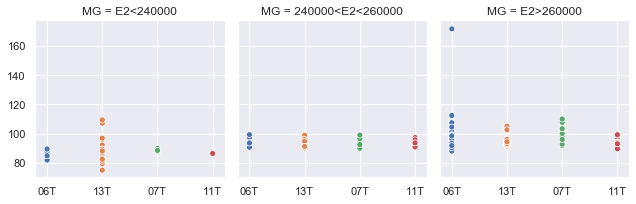

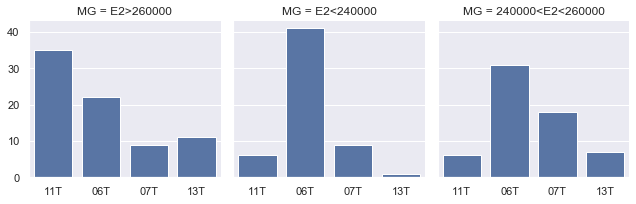

In [53]:
#Scatterplot Q theo loai xe vs Muc gia + Barplot so chuyen theo loai xe vs Muc gia
sort = [" 06T", "07T", "11T", "13T"]
g1 = sns.FacetGrid(df, col="MG", col_order=["E2<240000","240000<E2<260000","E2>260000"])
g1.map_dataframe(sns.scatterplot, x="Loai xe", y="Quang duong (km)", hue = "Loai xe" )

g2 = sns.FacetGrid(df, col="MG")
g2.map_dataframe(sns.countplot, x = "Loai xe" )
plt.show()

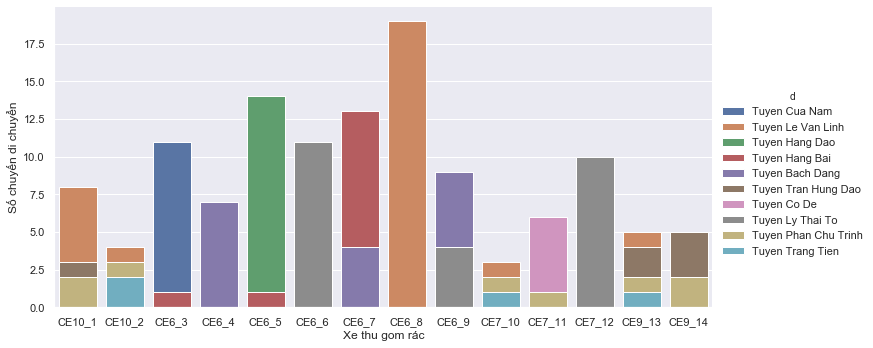

In [57]:
#Countplot ten xe vs tuyen
d = df.groupby("SO XE")["M"].sum()
g = sns.catplot(data = df, x = "SO XE", kind = "count", dodge=False, hue="d", order=d.index, aspect = 2)
g.set_axis_labels("Xe thu gom rác", "Số chuyến di chuyển")
plt.show()



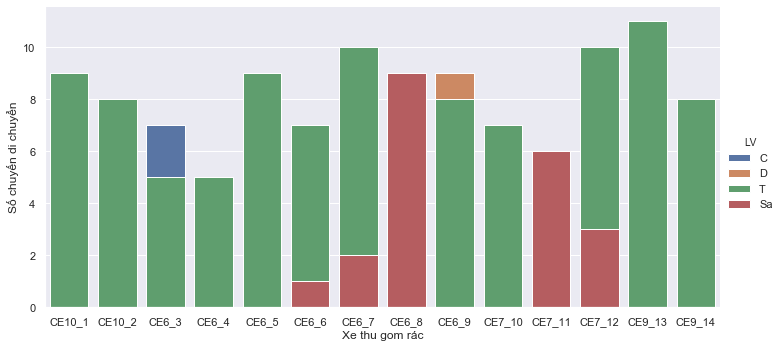

In [63]:
#Countplot ten xe vs tuyen
d = df.groupby("SO XE")["M"].sum()
g = sns.catplot(data = df, x = "SO XE", kind = "count", dodge=False, hue="LV", order=d.index, aspect = 2)
g.set_axis_labels("Xe thu gom rác", "Số chuyến di chuyển")
plt.show()